In [1]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

# 設定 data_path
dir_data = 'C:/Users/IRIS168'

In [2]:
f_app = os.path.join(dir_data, 'application_train.csv')
print('Path of read in data: %s' % (f_app))
app_train = pd.read_csv(f_app)
app_train.head()

Path of read in data: C:/Users/IRIS168\application_train.csv


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


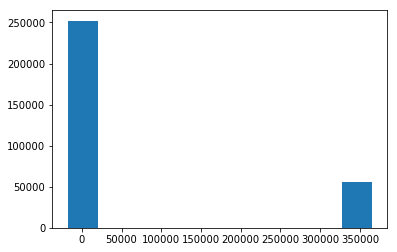

 365243    55374
-200         156
-224         152
-199         151
-230         151
-212         150
-229         143
-384         143
-231         140
-215         138
-207         138
-188         137
-216         137
-116         136
-196         136
-222         135
-193         134
-195         133
-214         132
-213         131
-254         131
-381         130
-201         130
-233         128
-185         128
-237         127
-194         127
-184         126
-234         126
-209         125
           ...  
-12768         1
-10604         1
-10857         1
-8810          1
-14955         1
-11113         1
-11369         1
-13420         1
-10346         1
-10860         1
-12649         1
-10358         1
-12650         1
-10870         1
-12919         1
-14968         1
-13175         1
-11382         1
-10101         1
-12150         1
-10603         1
-12393         1
-9694          1
-11741         1
-13162         1
-11115         1
-11371         1
-11883        

In [3]:
# DAYS_EMPLOYED: 申請貸款前，申請人已在現職工作的時間
(app_train['DAYS_EMPLOYED'] / 365).describe()
plt.hist(app_train['DAYS_EMPLOYED'])
plt.show()
app_train['DAYS_EMPLOYED'].value_counts()

In [4]:
(app_train['DAYS_EMPLOYED'] / 365).describe()

count    307511.000000
mean        174.835742
std         387.056895
min         -49.073973
25%          -7.561644
50%          -3.323288
75%          -0.791781
max        1000.665753
Name: DAYS_EMPLOYED, dtype: float64

In [5]:
anom = app_train[app_train['DAYS_EMPLOYED'] == 365243]
non_anom = app_train[app_train['DAYS_EMPLOYED'] != 365243]
print('The non-anomalies default on %0.2f %% of loans' % (100 * non_anom['TARGET'].mean()))
print('The anomalies default on %0.2f%% of loans' % (100 * anom['TARGET'].mean()))
print('There are %d anomalous days of employment' % len(anom))

The non-anomalies default on 8.66 % of loans
The anomalies default on 5.40% of loans
There are 55374 anomalous days of employment


False    252137
True      55374
Name: DAYS_EMPLOYED_ANOM, dtype: int64


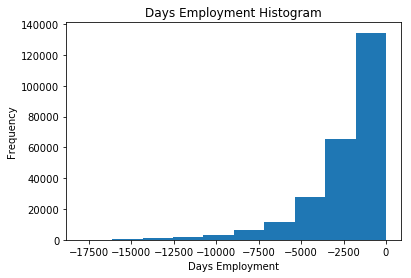

In [6]:
# 新增一個欄位: DAYS_EMPLOYED_ANOM 來標記 DAYS_EMPLOYED 是否異常
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
print(app_train['DAYS_EMPLOYED_ANOM'].value_counts())

# 這邊我們用 nan 將異常值取代
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

app_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');

In [7]:
app_train["DAYS_EMPLOYED"] == 365243

0         False
1         False
2         False
3         False
4         False
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12        False
13        False
14        False
15        False
16        False
17        False
18        False
19        False
20        False
21        False
22        False
23        False
24        False
25        False
26        False
27        False
28        False
29        False
          ...  
307481    False
307482    False
307483    False
307484    False
307485    False
307486    False
307487    False
307488    False
307489    False
307490    False
307491    False
307492    False
307493    False
307494    False
307495    False
307496    False
307497    False
307498    False
307499    False
307500    False
307501    False
307502    False
307503    False
307504    False
307505    False
307506    False
307507    False
307508    False
307509    False
307510    False
Name: DAYS_EMPLOYED, Len

In [8]:
app_train['DAYS_EMPLOYED']

0         -637.0
1        -1188.0
2         -225.0
3        -3039.0
4        -3038.0
5        -1588.0
6        -3130.0
7         -449.0
8            NaN
9        -2019.0
10        -679.0
11           NaN
12       -2717.0
13       -3028.0
14        -203.0
15       -1157.0
16       -1317.0
17        -191.0
18       -7804.0
19       -2038.0
20       -4286.0
21       -1652.0
22       -4306.0
23           NaN
24        -746.0
25       -3494.0
26       -2628.0
27       -1234.0
28       -1796.0
29       -1010.0
           ...  
307481   -3147.0
307482    -226.0
307483       NaN
307484    -328.0
307485    -670.0
307486   -1185.0
307487       NaN
307488   -1218.0
307489    -286.0
307490   -1928.0
307491   -1953.0
307492   -1618.0
307493   -2306.0
307494   -6573.0
307495   -7438.0
307496   -2178.0
307497   -1222.0
307498   -3689.0
307499   -8694.0
307500   -5326.0
307501   -1046.0
307502   -8736.0
307503    -399.0
307504   -7258.0
307505       NaN
307506    -236.0
307507       NaN
307508   -7921

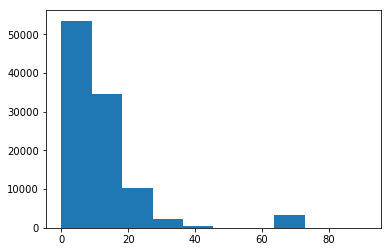

7.0     7424
6.0     6382
3.0     6370
8.0     5887
2.0     5852
4.0     5557
1.0     5280
9.0     5020
10.0    4806
14.0    4594
13.0    4566
12.0    4257
11.0    4161
5.0     3595
15.0    3580
16.0    3355
17.0    2899
64.0    2443
18.0    2418
0.0     2134
19.0    1864
20.0    1527
21.0    1462
22.0    1250
24.0    1150
23.0    1067
65.0     891
25.0     865
26.0     580
28.0     542
        ... 
30.0     326
31.0     267
32.0     208
34.0     183
35.0     157
33.0     132
36.0     124
38.0      97
40.0      85
39.0      78
37.0      75
41.0      58
42.0      42
44.0      21
43.0      19
54.0      12
45.0      11
49.0       6
46.0       5
55.0       4
51.0       3
63.0       2
91.0       2
69.0       1
48.0       1
52.0       1
56.0       1
47.0       1
50.0       1
57.0       1
Name: OWN_CAR_AGE, Length: 62, dtype: int64

In [9]:
# 檢查 OWN_CAR_AGE: 貸款人的車齡
plt.hist(app_train[~app_train.OWN_CAR_AGE.isnull()]['OWN_CAR_AGE'])
plt.show()
app_train['OWN_CAR_AGE'].value_counts()

In [10]:
app_train[app_train['OWN_CAR_AGE'] > 50]['OWN_CAR_AGE'].value_counts()

64.0    2443
65.0     891
54.0      12
55.0       4
51.0       3
91.0       2
63.0       2
57.0       1
69.0       1
52.0       1
56.0       1
Name: OWN_CAR_AGE, dtype: int64

In [11]:
app_train['OWN_CAR_AGE'].describe()

count    104582.000000
mean         12.061091
std          11.944812
min           0.000000
25%           5.000000
50%           9.000000
75%          15.000000
max          91.000000
Name: OWN_CAR_AGE, dtype: float64

In [12]:
print("Target of OWN_CAR_AGE >= 50: %.2f%%" % (app_train[app_train['OWN_CAR_AGE'] >= 50 ]['TARGET'].mean() * 100 ))
print("Target of OWN_CAR_AGE < 50: %.2f%%" % (app_train[app_train['OWN_CAR_AGE'] < 50]['TARGET'].mean() * 100))

app_train['OWN_CAR_AGE_ANOM'] = app_train['OWN_CAR_AGE'] >= 50

Target of OWN_CAR_AGE >= 50: 8.36%
Target of OWN_CAR_AGE < 50: 7.21%


# 作業6

In [13]:
dir_data = 'C:/Users/IRIS168'
f_app = os.path.join(dir_data, 'application_train.csv')
print('Path of read in data: %s' % (f_app))
app_train = pd.read_csv(f_app)
app_train.head()

Path of read in data: C:/Users/IRIS168\application_train.csv


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [54]:
# 過濾掉為NAN的部分
app_train = app_train.dropna(axis=1,how='any')

In [56]:
# 先篩選數值型的欄位
dtype_select = ["float"]

numeric_columns = list(app_train.columns[list(app_train.dtypes.isin(dtype_select))])

# 再把只有 2 值 (通常是 0,1) 的欄位去掉
numeric_columns = list(app_train[numeric_columns].dropna(axis=0,how='any').columns[list(app_train[numeric_columns].apply(lambda x:len(x.unique())!=2 ))])


In [57]:
print("Numbers of remain columns" , len(numeric_columns))

Numbers of remain columns 65


In [58]:
numeric_columns

['AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_REGISTRATION',
 'OWN_CAR_AGE',
 'CNT_FAM_MEMBERS',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'FLOORSMIN_M

{'whiskers': [<matplotlib.lines.Line2D at 0x1cc25cfd240>,
 'caps': [<matplotlib.lines.Line2D at 0x1cc2615c240>,
 'boxes': [<matplotlib.lines.Line2D at 0x1cc25cfd5c0>],
 'medians': [<matplotlib.lines.Line2D at 0x1cc2615c6a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1cc0012d550>],
 'means': []}

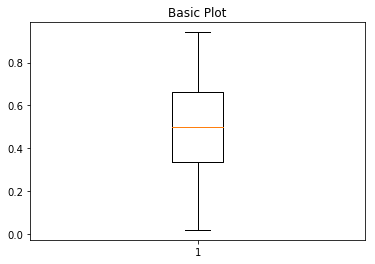

In [62]:
fig1, ax1 = plt.subplots()
ax1.set_title('Basic Plot')
ax1.boxplot(app_train["EXT_SOURCE_1"])

In [63]:
path = 'C:/Users/IRIS168'
# 檢視這些欄位的數值範圍 繪成盒狀圖
for col in numeric_columns:
    fig1, ax1 = plt.subplots()
    ax1.set_title(col)
    ax1.boxplot(app_train[col])
    figname = 'fig_{}.png'.format(col)
    dest = os.path.join(path, figname)
    plt.savefig(dest)
    plt.clf()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

### fig_AMT_INCOME_TOTAL  fig_CNT_FAM_MEMBERS  fig_NONLIVINGAPARTMENTS_AVG  fig_OBS_30 60_CNT_SOCIAL_CIRCLE  fig_OWN_CAR_AGE  fig_YEARS_BUILD_AVG  fig_YEARS_BUILD_MEDI fig_YEARS_BUILD_MODE 都挺可疑的，有很多的離群值，許多關於時間上的資料的分布都跟一般的情形不同。

In [90]:
sort_data = app_train['AMT_INCOME_TOTAL'].sort_values()

In [91]:
print(sort_data)

288631      33750.0
231125      38250.0
83568       40500.0
73392       45000.0
150006      45000.0
134918      45000.0
43469       49500.0
24616       49500.0
171867      51817.5
169164      53977.5
62627       54000.0
130031      54000.0
161924      54000.0
5617        54000.0
115215      54000.0
241289      54000.0
220510      58500.0
66256       58500.0
233854      58500.0
52299       58500.0
174704      58500.0
103443      58500.0
134070      58500.0
184904      58500.0
173881      59850.0
197237      63000.0
128147      65250.0
95263       67500.0
248492      67500.0
252929      67500.0
            ...    
154168     990000.0
7061      1035000.0
269915    1035000.0
45277     1125000.0
296216    1125000.0
95940     1125000.0
100001    1125000.0
232447    1125000.0
293055    1125000.0
80573     1125000.0
265884    1170000.0
256557    1192500.0
81607     1215000.0
275313    1306831.5
133766    1307587.5
163029    1350000.0
46309     1350000.0
265060    1350000.0
122764    1350000.0


In [92]:
list(cdf.index)

[288631,
 231125,
 83568,
 73392,
 150006,
 134918,
 43469,
 24616,
 171867,
 169164,
 62627,
 130031,
 161924,
 5617,
 115215,
 241289,
 220510,
 66256,
 233854,
 52299,
 174704,
 103443,
 134070,
 184904,
 173881,
 197237,
 128147,
 95263,
 248492,
 252929,
 209557,
 83986,
 85768,
 299136,
 76775,
 99638,
 207793,
 83166,
 139258,
 204310,
 73909,
 206234,
 262360,
 168693,
 90299,
 211236,
 95499,
 245003,
 303007,
 223983,
 224003,
 143422,
 145650,
 145756,
 147116,
 232222,
 10032,
 150579,
 234762,
 246916,
 151241,
 216778,
 120038,
 118761,
 301369,
 111805,
 111027,
 11940,
 212466,
 104853,
 304466,
 104172,
 151413,
 11744,
 141731,
 186094,
 199159,
 68445,
 267607,
 56262,
 174481,
 188146,
 173184,
 273950,
 175018,
 58603,
 201256,
 22159,
 201221,
 59875,
 273652,
 284938,
 276537,
 70109,
 264591,
 20592,
 183544,
 43536,
 70684,
 306233,
 18081,
 181518,
 19840,
 171783,
 287981,
 306227,
 280735,
 115654,
 282567,
 20679,
 227553,
 166772,
 297751,
 259134,
 17097,

(-0.05, 1.05)

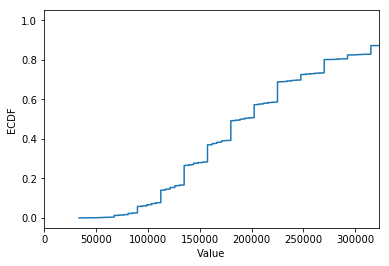

In [98]:
Sort_data=list(app_train['AMT_INCOME_TOTAL'].sort_values())
Density  = np.arange(1,len(Sort_data)+1)/len(Sort_data)

plt.plot(Sort_data, Density)
plt.xlabel('Value')
plt.ylabel('ECDF')
plt.xlim([cdf.index.min(), cdf.index.max() * 1.05]) # 限制顯示圖片的範圍
plt.ylim([-0.05,1.05]) # 限制顯示圖片的範圍

count    8.602000e+03
mean     2.228724e+05
std      1.414204e+05
min      3.375000e+04
25%      1.350000e+05
50%      1.935000e+05
75%      2.700000e+05
max      4.500000e+06
Name: AMT_INCOME_TOTAL, dtype: float64


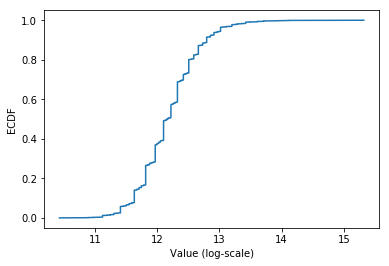

In [99]:
# 最大值離平均與中位數很遠
print(app_train['AMT_INCOME_TOTAL'].describe())

# 繪製 Empirical Cumulative Density Plot (ECDF)

# 改變 y 軸的 Scale, 讓我們可以正常檢視 ECDF
plt.plot(np.log(Sort_data), Density)
plt.xlabel('Value (log-scale)')
plt.ylabel('ECDF')

plt.ylim([-0.05,1.05]) # 限制顯示圖片的範圍

plt.show()